In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import string

In [2]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

from gensim.models import Word2Vec
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

C:\Users\od297\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\od297\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\od297\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\od297\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
st.set_page_config(page_title ='Indeed Data Science Job Postings')
st.header('Data Science Job Posts')
st.subheader('Team 67')

2021-07-29 14:56:08.850 
  command:

    streamlit run C:\Users\od297\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [4]:
us_state_abbrev_reverse = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'PR': 'Puerto Rico',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
}

#Northern Mariana Islands':'MP', 'Palau': 'PW', 'Puerto Rico': 'PR', 'Virgin Islands': 'VI', 'District of Columbia': 'DC'

In [5]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

#'Northern Mariana Islands':'MP', 'Palau': 'PW', 'Puerto Rico': 'PR', 'Virgin Islands': 'VI', 'District of Columbia': 'DC'
#abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [6]:
# Load CSV file into a DataFrame
#ds_jobs_df = pd.read_csv('job_postings_June_2021.csv')
ds_jobs_df = pd.read_csv('Indeed_Data_Science_Job_Postings_June_2021_DS4A_Project.csv')

In [7]:
#drop duplicates
ds_jobs = ds_jobs_df.copy()
ds_jobs.drop_duplicates(inplace=True)

In [8]:
ds_jobs.dropna(inplace = True)

2021-07-29 14:54:56.429 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


#### Data Cleaning

In [9]:
def clean_city(df):
    new = df['location'].str.split(",", expand = True)
    n1 = new[0].str.split("+", expand = True)
    new['city'] = n1[0]
    n4 = new['city'].str.split("•", expand = True)
    job_data['city'] = n4[0]
    #return job_data['city']

In [10]:
def clean_location(df):
    new = df['location'].str.split(",", expand = True)
    
    #clean_city(df)
    #Clean City
    n1 = new[0].str.split("+", expand = True)
    new['city'] = n1[0]
    n4 = new['city'].str.split("•", expand = True)
    new['city'] = n4[0]
    df['city'] = n4[0]
    
    #Clean State
    n2 = new[1].str.split(" ", expand = True)
    n2 = n2[1].str.replace('•', "+")
    n2 = n2.str.replace('+', " ")
    n2 = n2.str.split(" ", expand = True)
    new['State'] = n2[0]
    new['State'] = new['State'].replace(us_state_abbrev_reverse)
    new['State'].fillna(value='empty', inplace=True)
    new['State'].replace('empty', 'Same_with_City', inplace=True)
    
    new['State'] = np.where(new['State'] == 'Same_with_City', new['city'], new['State'])
    df['State'] = new['State']
    
    df['location'] = df[['city', 'State']].apply(lambda x: ', '.join(x), axis=1)
    
    return df

In [11]:
jobs = clean_location(ds_jobs)

In [12]:
def clean_text(text):
    text = str(text)
    text = text.replace("\n"," ")
    text = text.lower()
    #text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    return text.lower()

In [13]:
jobs["clean_description"] = jobs["description"].apply(clean_text)

#### Analysis of Job Titles

In [14]:
Total_num_job_titles = jobs['title'].nunique()
print('Total number of titles related to job postings: ', Total_num_job_titles)

Total number of titles related to job postings:  782


In [15]:
#Most common roles across companies
Most_common_job_title = jobs.groupby(['title'])['company'].count()
Most_common_job_title = Most_common_job_title.reset_index()
Most_common_job_title = Most_common_job_title.sort_values(['company'], ascending=False)
Most_common_job_title = Most_common_job_title.head(25)
Most_common_job_title

,title,company
155,Data Scientist,118
537,Senior Data Scientist,41
512,Senior Data Analyst,23
363,Machine Learning Engineer,16
584,Senior Machine Learning Engineer,11
341,Lead Data Scientist,11
432,Principal Data Scientist,8
207,Data Scientist II,7
54,Associate Data Scientist,6
732,Staff Machine Learning Engineer,6


Text(0, 0.5, 'NO OF ROLES ACROSS INDUSTRY')

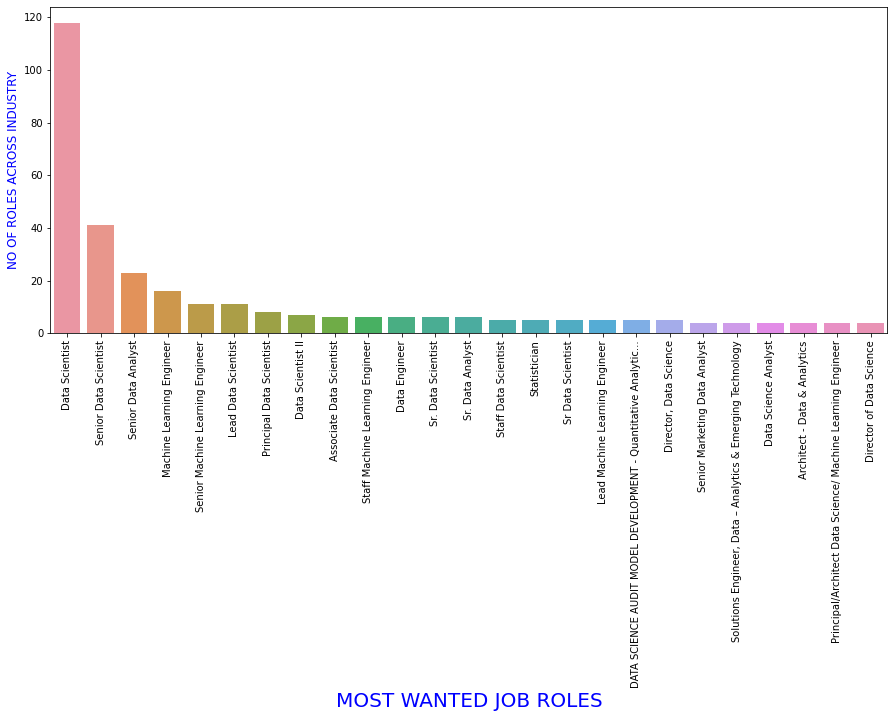

In [16]:
# Plot graph for top most offered roles
fig,ax=plt.subplots(figsize=(15,6))
ax=sns.barplot(x="title", y="company", data = Most_common_job_title)    
ax.set_xticklabels(Most_common_job_title['title'], rotation=90)
ax.set_xlabel('MOST WANTED JOB ROLES', fontsize=20, color='blue')
ax.set_ylabel('NO OF ROLES ACROSS INDUSTRY', fontsize=12,color='blue')

#### Categorizing Job Titles

In [17]:
#There are so many job profiles in the given dataset so lets Categories them into 5; Data Scientist, Machine Learning Engineer, Data Analyst, Data Science Manager and Others

# Creating only 5 datascience roles among all
data = jobs.copy()

#data.dropna(subset=['title'], how='all', inplace = True)
data['position']= [x.upper() for x in data['title']]
data['description'] = [x.upper() for x in data['description']]

data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'

data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

#data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine Learning Engineer') | (data.position == 'Data Science Manager')]
#data.position=['Others' if x is np.nan else x for x in data.position]

position=data.groupby(['position'])['company'].count()   
position=position.reset_index(name='company')
position=position.sort_values(['company'],ascending=False)

#print('Here is  the count of each new roles we created :', '\n\n', position)

<AxesSubplot:xlabel='position'>

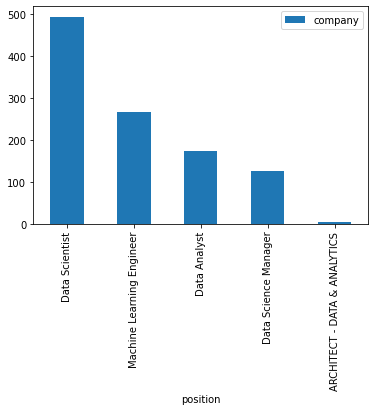

In [18]:
t_roles = position.head(5)
t_roles.plot.bar(x='position', y='company')

#### Analyzing Job Descriptions

In [39]:
data["clean_description"] = data["description"].apply(clean_text)

In [40]:
sentences = []
sent_word_sets = []
for row in data.iterrows():
    desc = row[1].clean_description
    word_tokens = nltk.word_tokenize(desc)
    sentences.append(word_tokens)
    sent_word_sets.append(set(word_tokens))

In [41]:
model = Word2Vec(sentences=sentences, window=5, min_count=10, workers=4)#,size=100

2021-07-29 15:01:02.720 collecting all words and their counts
2021-07-29 15:01:02.722 PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-07-29 15:01:02.873 collected 18752 word types from a corpus of 676979 raw words and 1139 sentences
2021-07-29 15:01:02.873 Creating a fresh vocabulary
2021-07-29 15:01:02.900 Word2Vec lifecycle event {'msg': 'effective_min_count=10 retains 4357 unique words (23.23485494880546%% of original 18752, drops 14395)', 'datetime': '2021-07-29T15:01:02.900798', 'gensim': '4.0.1', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
2021-07-29 15:01:02.900 Word2Vec lifecycle event {'msg': 'effective_min_count=10 leaves 642906 word corpus (94.96690443869012%% of original 676979, drops 34073)', 'datetime': '2021-07-29T15:01:02.900798', 'gensim': '4.0.1', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windo

In [21]:
possible_words = set()
similar_words = model.wv.most_similar('bachelor', topn=30)
for tup in similar_words:
    possible_words.add(tup[0])
similar_words

[('bs', 0.9244299530982971),
 ('babs', 0.9129831194877625),
 ('masters', 0.8978414535522461),
 ('bachelors', 0.8817331194877625),
 ('stem', 0.8739314079284668),
 ('msphd', 0.8615568280220032),
 ('graduate', 0.8609715700149536),
 ('phd', 0.8571900725364685),
 ('higher', 0.8520011305809021),
 ('msc', 0.8471347093582153),
 ('degree', 0.839551568031311),
 ('undergraduate', 0.8325367569923401),
 ('completed', 0.8160426616668701),
 ('lieu', 0.8128546476364136),
 ('ba', 0.8117666840553284),
 ('discipline', 0.8099421262741089),
 ('doctorate', 0.8038915991783142),
 ('minimum', 0.7868942022323608),
 ('mba', 0.7779513597488403),
 ('physics', 0.7700871825218201),
 ('courses', 0.7679644823074341),
 ('doctoral', 0.7650461196899414),
 ('chemistry', 0.7646817564964294),
 ('gpa', 0.7646759152412415),
 ('semester', 0.7633313536643982),
 ('substitution', 0.7631812691688538),
 ('earned', 0.7591040134429932),
 ('mathematics', 0.7586268186569214),
 ('math', 0.7581011652946472),
 ('equivalent', 0.75564944744

In [22]:
similar_words = model.wv.most_similar('masters', topn=30)
for tup in similar_words:
    possible_words.add(tup[0])
similar_words

[('babs', 0.9590710401535034),
 ('bs', 0.9577202796936035),
 ('phd', 0.9457247257232666),
 ('degree', 0.9405272006988525),
 ('bachelors', 0.9378999471664429),
 ('msphd', 0.9305527210235596),
 ('msc', 0.9100608229637146),
 ('stem', 0.9032991528511047),
 ('discipline', 0.8980056643486023),
 ('bachelor', 0.8978413939476013),
 ('graduate', 0.887712299823761),
 ('undergraduate', 0.8685937523841858),
 ('higher', 0.8682172298431396),
 ('mba', 0.8665940165519714),
 ('equivalent', 0.8537271618843079),
 ('doctorate', 0.8364248275756836),
 ('math', 0.8338128328323364),
 ('ba', 0.8247600793838501),
 ('field', 0.8210573196411133),
 ('chemistry', 0.8208099603652954),
 ('lieu', 0.8145561814308167),
 ('ms', 0.8139223456382751),
 ('physics', 0.8039573431015015),
 ('mathematics', 0.795754611492157),
 ('minimum', 0.789177656173706),
 ('gpa', 0.78246009349823),
 ('education', 0.7796660661697388),
 ('statistics', 0.7722395062446594),
 ('courses', 0.7715477347373962),
 ('semester', 0.7605236172676086)]

In [23]:
similar_words = model.wv.most_similar('phd', topn=30)
for tup in similar_words:
    possible_words.add(tup[0])
similar_words

[('masters', 0.9457248449325562),
 ('bs', 0.9318739175796509),
 ('babs', 0.9189506769180298),
 ('degree', 0.9097623229026794),
 ('msphd', 0.9092165231704712),
 ('msc', 0.9069457650184631),
 ('mba', 0.9029453992843628),
 ('graduate', 0.8989765644073486),
 ('stem', 0.8897097110748291),
 ('discipline', 0.8848401308059692),
 ('higher', 0.8831385970115662),
 ('equivalent', 0.8785170912742615),
 ('undergraduate', 0.8689437508583069),
 ('ms', 0.8686628341674805),
 ('bachelor', 0.8571901321411133),
 ('field', 0.8568300008773804),
 ('lieu', 0.8501461744308472),
 ('chemistry', 0.844454288482666),
 ('coursework', 0.8431932926177979),
 ('bachelors', 0.8398858308792114),
 ('semester', 0.8361563086509705),
 ('ba', 0.8329905271530151),
 ('physics', 0.8325884938240051),
 ('courses', 0.8325098752975464),
 ('doctorate', 0.8298200368881226),
 ('math', 0.828881561756134),
 ('gpa', 0.8172631859779358),
 ('degrees', 0.8110048174858093),
 ('mathematics', 0.806591272354126),
 ('either', 0.8053078055381775)]

In [24]:
bachelor_list = ['bs','b.s','bsc','bs/ms','bachelor','ba/bs','b.s.','bs/ms/phd','bachelors','ba','bs/ba','undergraduate']
master_list = ['masters','master','bs/ms','m.s.','m.s','msc','bs/ms/phd','ms','md/phd','ms/phd','postgraduate']
phd_list = ['phd','ph.d.','ph.d','bs/ms/phd','md/phd','ms/phd','doctoral','postgraduate','doctorate']

In [43]:
jobs["sent_word_sets"] = sent_word_sets
data["sent_word_sets"] = sent_word_sets

In [44]:
def has_qual(word_set,qual_list):
    for word in qual_list:
        if word in word_set: #we want this part to be o(1) since qual_list is much shorter than word_set
            return True
    return False

In [45]:
jobs["bachelors"] = jobs["sent_word_sets"].apply(lambda x: has_qual(x,bachelor_list))
jobs["masters"] = jobs["sent_word_sets"].apply(lambda x: has_qual(x,master_list))
jobs["phd"] = jobs["sent_word_sets"].apply(lambda x: has_qual(x,phd_list))

In [46]:
print("Number of jobs with descriptions have bachelor:", jobs["bachelors"].sum())
print("Number of jobs with descriptions have masters:", jobs["masters"].sum())
print("Number of jobs with descriptions have phd:", jobs["phd"].sum())

Number of jobs with descriptions have bachelor: 566
Number of jobs with descriptions have masters: 530
Number of jobs with descriptions have phd: 283


In [47]:
def get_minimum(hasBsc,hasMsc,hasPhd):
    """
    returns minimum qualification if any
    """
    if hasBsc:
        return "Bachelors"
    
    elif hasMsc:
        return "Masters"
    
    elif hasPhd:
        return "Phd"
    
    else:
        return "No qualifications stated"

In [48]:
jobs["min_qualification"] = jobs.apply(lambda x: get_minimum(x.bachelors,x.masters,x.phd),axis=1)

In [49]:
value_counts = jobs["min_qualification"].value_counts()

In [50]:
print("The number jobs that require a minimum of Bachelors are",value_counts["Bachelors"])
print("The number jobs that require a minimum of Masters are",value_counts["Masters"])
print("The number jobs that require a minimum of Phd are",value_counts["Phd"])
print("The number jobs that does not state education require",value_counts["No qualifications stated"])
print("The total number of jobs are", jobs.shape[0])

The number jobs that require a minimum of Bachelors are 566
The number jobs that require a minimum of Masters are 240
The number jobs that require a minimum of Phd are 43
The number jobs that does not state education require 290
The total number of jobs are 1139


#### Word Cloud of Job Descriptions

In [51]:
lemmatizer = WordNetLemmatizer()
def clean_position(text):    
    text = re.sub(r"[^A-Za-z0-9]", " ", str(text)).lower()
    text_tokens = nltk.word_tokenize(text)
    text_lemmatized = [lemmatizer.lemmatize(word) for word in text_tokens]
    return " ".join(text_lemmatized)

data["clean_position"] = data.title.apply(clean_position)

In [52]:
lemmatizer = WordNetLemmatizer()
def clean_position(text):    
    text = re.sub(r"[^A-Za-z0-9]", " ", str(text)).lower()
    text_tokens = nltk.word_tokenize(text)
    text_lemmatized = [lemmatizer.lemmatize(word) for word in text_tokens]
    return " ".join(text_lemmatized)

data["clean_position"] = data.title.apply(clean_position)

In [53]:
def has_qual(word_set,qual_list):
    for word in qual_list:
        if word in word_set: #we want this part to be o(1) since qual_list is much shorter than word_set
            return True
    return False

In [54]:
data["bachelors"] = data["sent_word_sets"].apply(lambda x: has_qual(x,bachelor_list))
data["masters"] = data["sent_word_sets"].apply(lambda x: has_qual(x,master_list))
data["phd"] = data["sent_word_sets"].apply(lambda x: has_qual(x,phd_list))

In [56]:
data["min_qualification"] = data.apply(lambda x: get_minimum(x.bachelors,x.masters,x.phd),axis=1)

In [57]:
bsc_string = " ".join(data["clean_position"][data["min_qualification"]=="Bachelors"])
msc_string = " ".join(data["clean_position"][data["min_qualification"]=="Masters"])
phd_string = " ".join(data["clean_position"][data["min_qualification"]=="Phd"])

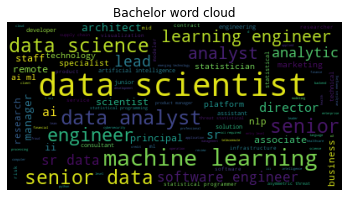

In [58]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=100).generate(bsc_string)
plt.clf()
plt.title("Bachelor word cloud")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

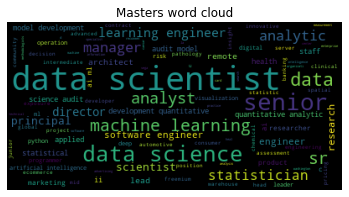

In [59]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=100).generate(msc_string)
plt.clf()
plt.title("Masters word cloud")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

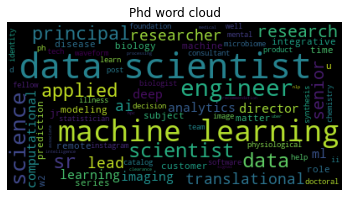

In [60]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=100).generate(phd_string)
plt.clf()
plt.title("Phd word cloud")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [61]:
data_qual = data.groupby('min_qualification').size()

<AxesSubplot:xlabel='min_qualification'>

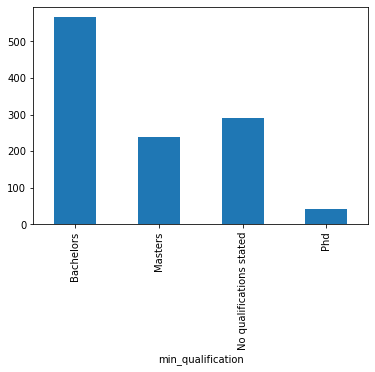

In [62]:
data_qual.plot.bar()

#### Understanding Degree Requirements - Most sought Degree Programs

In [67]:
degree = data[data['clean_description'].str.contains('degree')]

In [80]:
def degree_extraction(row):
    d = ','.join([a for a in row.split('\n') if 'DEGREE' in a][0].split('DEGREE')[1:])
    return d

In [71]:
degree['description_majors'] = degree['description'].apply(degree_extraction)

In [69]:
#degree['description'].apply(degree_extraction)

0                       IN ENGINEERING OR TECHNICAL AREA.
1        IN COMPUTER SCIENCE, MATHEMATICS, PHYSICS, DA...
2        OF INDEPENDENCE OUR DATA SCIENTISTS HAVE HELP...
3        IN COMPUTER SCIENCE, OPERATIONS RESEARCH (OR)...
4        IN A QUANTITATIVE DISCIPLINE. EX: APPLIED MAT...
                              ...                        
4534     IN COMPUTER SCIENCE OR RELATED FIELD, OR EQUI...
4549    S IN STATISTICS, BIOSTATISTICS, AND/OR ECONOME...
4550                                                     
4565                                                     
4567     IN MATHEMATICS, STATISTICS, OPERATION RESEARC...
Name: description, Length: 743, dtype: object

In [72]:
degree_df = degree[degree['description_majors'].notnull()]

In [73]:
relevant_degrees = ['computer science', 'Mathematics','statistics', 'analytics', 'data analytics', 'supply_chain', 
                    'finance', 'economics', 'business', 'accounting', 'logistics', 'data_science',
                    'engineering', 'physics', 'operations_research']

In [74]:
degree_df['description_majors']
#d = degree_df[degree_df['description_majors'].str.contains('COMPUTER SCIENCE')]
comp_sci = degree_df[degree_df['description_majors'].str.contains('COMPUTER SCIENCE')]['description_majors'].count()
Mathematics = degree_df[degree_df['description_majors'].str.contains('MATHEMATICS')]['description_majors'].count()
statistics = degree_df[degree_df['description_majors'].str.contains('STATISTICS')]['description_majors'].count()
analytics = degree_df[degree_df['description_majors'].str.contains('ANALYTICS')]['description_majors'].count()
data_analytics = degree_df[degree_df['description_majors'].str.contains('DATA ANALYTICS')]['description_majors'].count()
supply_chain = degree_df[degree_df['description_majors'].str.contains('SUPPLY CHAIN')]['description_majors'].count()
finance = degree_df[degree_df['description_majors'].str.contains('FINANCE')]['description_majors'].count()
economics = degree_df[degree_df['description_majors'].str.contains('ECONOMICS')]['description_majors'].count()
business = degree_df[degree_df['description_majors'].str.contains('BUSINESS')]['description_majors'].count()
accounting = degree_df[degree_df['description_majors'].str.contains('ACCOUNTING')]['description_majors'].count()
logistics = degree_df[degree_df['description_majors'].str.contains('LOGISTICS')]['description_majors'].count()
data_science = degree_df[degree_df['description_majors'].str.contains('DATA SCIENCE')]['description_majors'].count()
physics = degree_df[degree_df['description_majors'].str.contains('PHYSICS')]['description_majors'].count()
operations_research = degree_df[degree_df['description_majors'].str.contains('OPERATIONS RESEARCH')]['description_majors'].count()
engineering = degree_df[degree_df['description_majors'].str.contains('ENGINEERING')]['description_majors'].count()                                                                                     

In [75]:
jobs_covered = set()
for degree in relevant_degrees:
    jobs_covered = jobs_covered | set(degree_df[degree_df['description_majors'].str.contains(degree.upper())].index.to_list())

In [76]:
majors_df = pd.DataFrame({'majors': [comp_sci, Mathematics, statistics, analytics, data_analytics, supply_chain, finance, economics, business, accounting, logistics, data_science, engineering, physics, operations_research]})
#columns=['comp_sci', 'Mathematics','statistics', 'supply_chain', 'finance', 'logistics', 'data_science','physics', 'operations_research']
major = majors_df.transpose()
major.columns = relevant_degrees 
major.transpose()

,majors
computer science,355
Mathematics,234
statistics,279
analytics,59
data analytics,19
supply_chain,2
finance,26
economics,112
business,72
accounting,5


<AxesSubplot:>

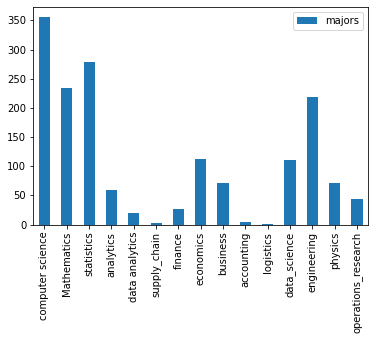

In [77]:
major.transpose().plot.bar()

In [82]:
m.reset_index()


,index,majors
0,computer science,355
1,Mathematics,234
2,statistics,279
3,analytics,59
4,data analytics,19
5,supply_chain,2
6,finance,26
7,economics,112
8,business,72
9,accounting,5


In [85]:
mains = m.reset_index()
mains.rename(columns={'index':'programs'}, inplace=True)
mains

,programs,majors
0,computer science,355
1,Mathematics,234
2,statistics,279
3,analytics,59
4,data analytics,19
5,supply_chain,2
6,finance,26
7,economics,112
8,business,72
9,accounting,5


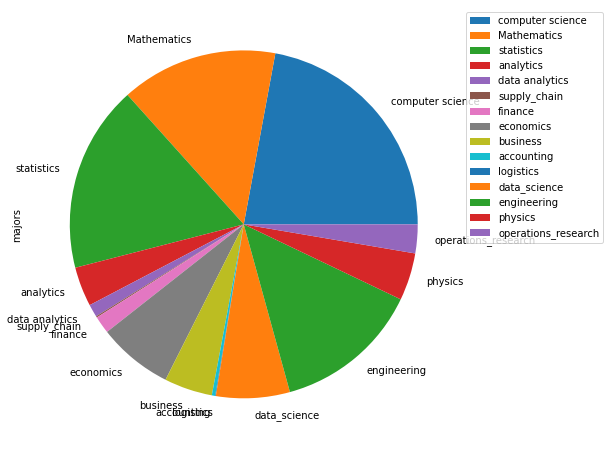

In [78]:
m = major.transpose()
m.plot.pie(subplots=True,y='majors', figsize=(15,8))
plt.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=0.5)

#### Extras

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Define the word cloud function with a max of 200 words
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=120, figure_size=(15,15), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)
    #define additional stop words that are not contained in the dictionary
    #more_stopwords = {'one', 'object', 'nTHE', 'Name', 'nARE', 'are','and','Unknown', 'H4','EAD','length','VISAS', 'dtype','startups'}
    #stopwords = stopwords.union(more_stopwords)
    #Generate the word cloud
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    #set the plot parameters
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
#ngram function
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

#Function to construct side by side comparison plots
def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="royalblue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="royalblue")

    ax[0].set_xlabel('Word count', size=14)
    ax[0].set_ylabel('Words', size=14)
    ax[0].set_title('Top 20 Bi-grams in Descriptions', size=18)

    ax[1].set_xlabel('Word count', size=14)
    ax[1].set_ylabel('Words', size=14)
    ax[1].set_title('Top 20 Tri-grams in Descriptions', size=18)

    fig.subplots_adjust(wspace=space)
    
    plt.show()


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

#phrase = "Here is an example sentence to demonstrate the removal of stopwords"

#words = word_tokenize(phrase)

stripped_phrase = []
stripped_sentence = []
for sentence in sentences:
    for word in sentence:
        if word not in stop_words:
            stripped_phrase.append(word)
    stripped_sentence.append(stripped_phrase)

des_1 = " ".join(stripped_phrase)

In [ ]:
plot_wordcloud(des_1, title="Word Cloud of Data Analyst Description")